# LexiGutenberg: Gutenberg books Analysis
Name: Eyal German

This notebook explores the Gutenberg books dataset using various NLP techniques. The dataset contains metadata and full-text documents from historical literary works.

## Dependencies
- **Text Processing:** NLTK, Spacy
- **Topic Modeling:** Gensim (LDA), BERTopic
- **Data Handling:** Pandas, NumPy, JSON
- **Visualization:** Matplotlib, Seaborn, WordCloud
- **Metadata Management:** Custom `metadata_manager.py`


## Import Libraries

In [2]:
import os
import pandas as pd
from tqdm import tqdm
from metadata_manager import TEXTS_PATH, load_metadata, get_metadata_by_file_id
from matplotlib import pyplot as plt

In [3]:
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

## Data Analysis

In [23]:
def file_len(file_path):
    """ Returns the number of lines in a file. """
    with open(file_path, 'r', encoding='utf-8') as f:
        return sum(1 for _ in f)  # Efficient line counting


metadata_df = load_metadata()

data = {'year': []}

for file in tqdm(os.listdir(TEXTS_PATH)):
    if not file.endswith('.txt'):
        continue
    book_data = get_metadata_by_file_id(file.split('.')[0])
    if book_data.empty:
        continue
    data['year'].append(book_data.year)
    data['length'].append(file_len(os.path.join(TEXTS_PATH, file)))
    df = pd.DataFrame(data)

100%|██████████| 7582/7582 [06:38<00:00, 19.03it/s]


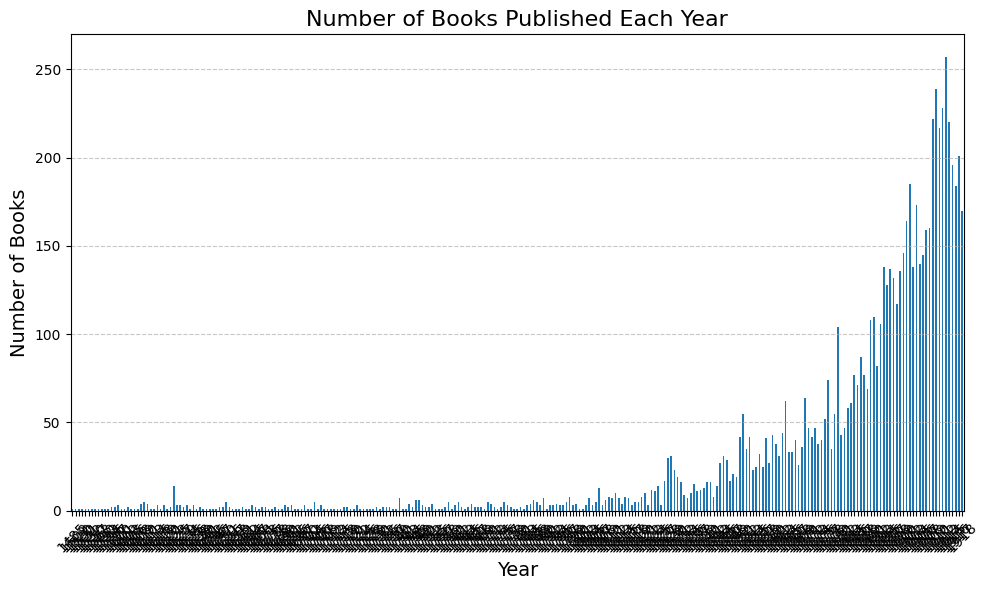

In [26]:
# Group by the 'year' column and count the number of books per year
df = pd.DataFrame(data)
df = df.dropna()
df['year'] = df['year'].astype(int)
books_per_year = df['year'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
books_per_year.plot(kind='bar')
plt.title("Number of Books Published Each Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Books", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

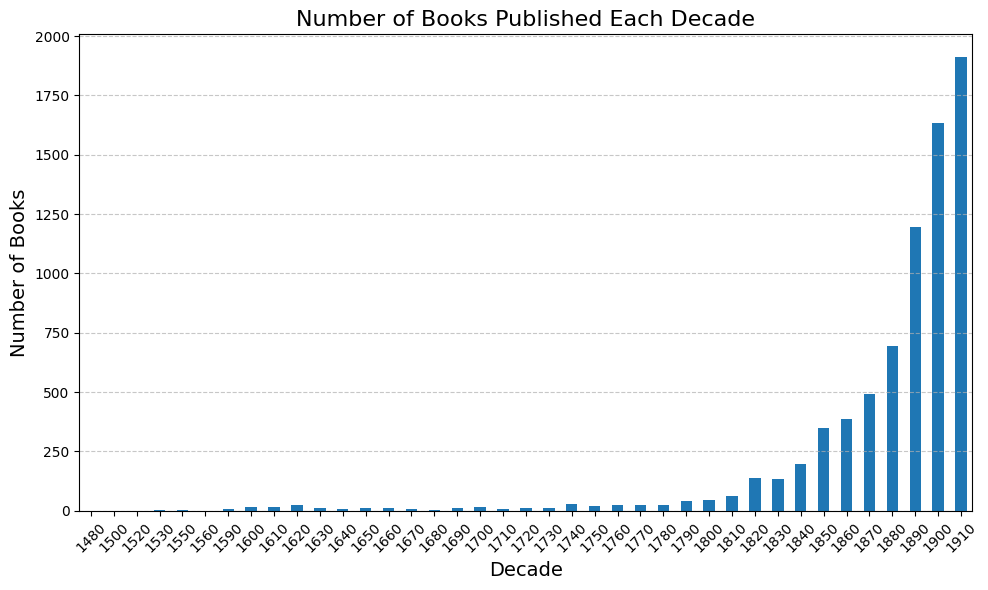

In [27]:
# Create a new column for decades by flooring the year to the nearest decade
df['decade'] = (df['year'] // 10) * 10

# Group by the 'decade' column and count the number of books per decade
books_per_decade = df['decade'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 4))
books_per_decade.plot(kind='bar')
plt.title("Number of Books Published Each Decade", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Number of Books", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Topic Modeling

Embedding model: sentence-transformers/all-distilroberta-v1


2025-02-17 13:26:04,115 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/237 [00:00<?, ?it/s]

2025-02-17 13:36:03,488 - BERTopic - Embedding - Completed ✓
2025-02-17 13:36:03,489 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-02-17 13:36:25,205 - BERTopic - Dimensionality - Completed ✓
2025-02-17 13:36:25,206 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-02-17 13:36:28,311 - BERTopic - Cluster - Completed ✓
2025-02-17 13:36:28,591 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-02-17 13:40:50,997 - BERTopic - Representation - Completed ✓
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


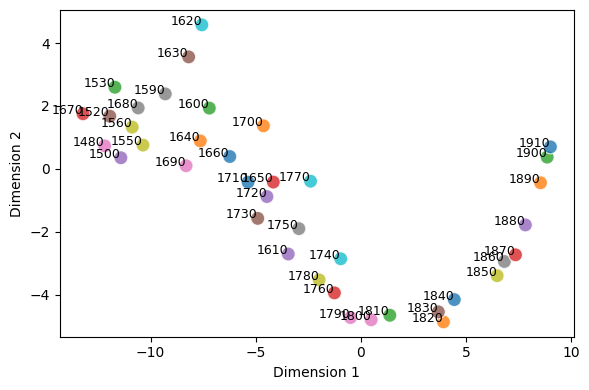

Century: 1620
Topics: {0, 65, 6, 39, 10, 24, 26, 27, -1}
Century: 1910
Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 54, 55, 57, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 111, 113, 114, -1}
Century: 1900
Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 102, 103, 105, 106, 107, 108, 109, 111, 112, 114, -1}
Century: 1610
Topics: {0, 1, 33, 5, 6, 10, 91, 27,

2025-02-17 13:48:31,249 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [3]:
from bert_topic_modeling import run_bertopic_workflow

os.makedirs(output_dir, exist_ok=True)
run_bertopic_workflow(TEXTS_PATH, output_dir)

## Word Cloud LDA

[nltk_data] Downloading package punkt to /home/germane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/germane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/germane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/sise/home/germane/BigData/gutenberg_books_train


Preprocessing text: 100%|██████████| 3398/3398 [19:12<00:00,  2.95it/s]  


Starting LDA training...


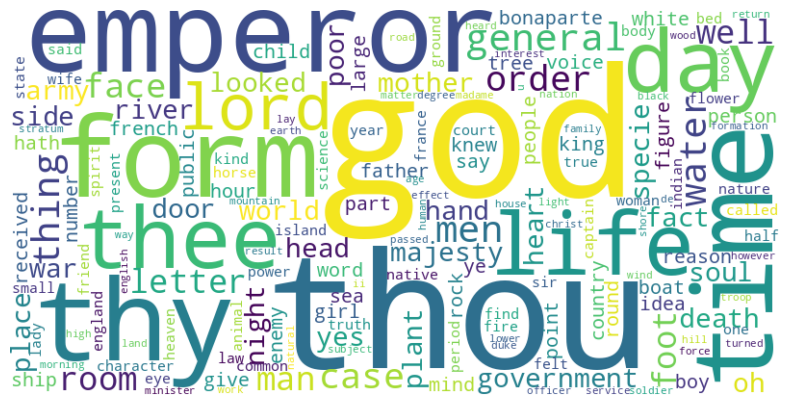

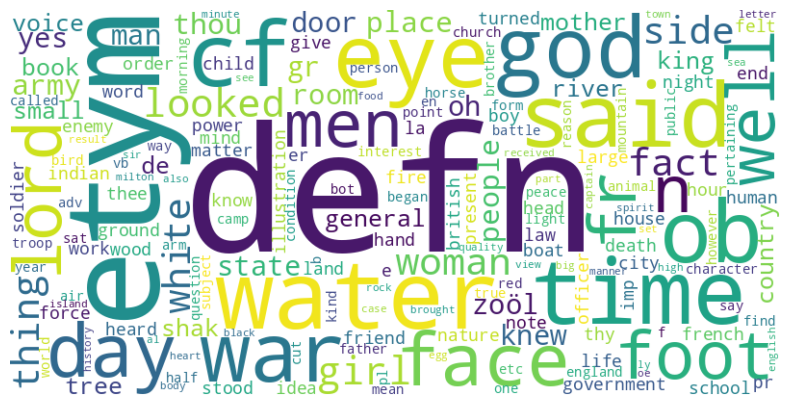

In [4]:
from lda_analysis import generate_wordclouds_by_year
output_dir = "saved_results"
folder_path = TEXTS_PATH
output_before_1900 = output_dir + "/wordcloud_before_1900.png"
output_after_1900 = output_dir + "/wordcloud_after_1900.png"
print(folder_path)
generate_wordclouds_by_year(folder_path, output_before_1900=output_before_1900, output_after_1900=output_after_1900)


## Gender Representation in Historical Texts

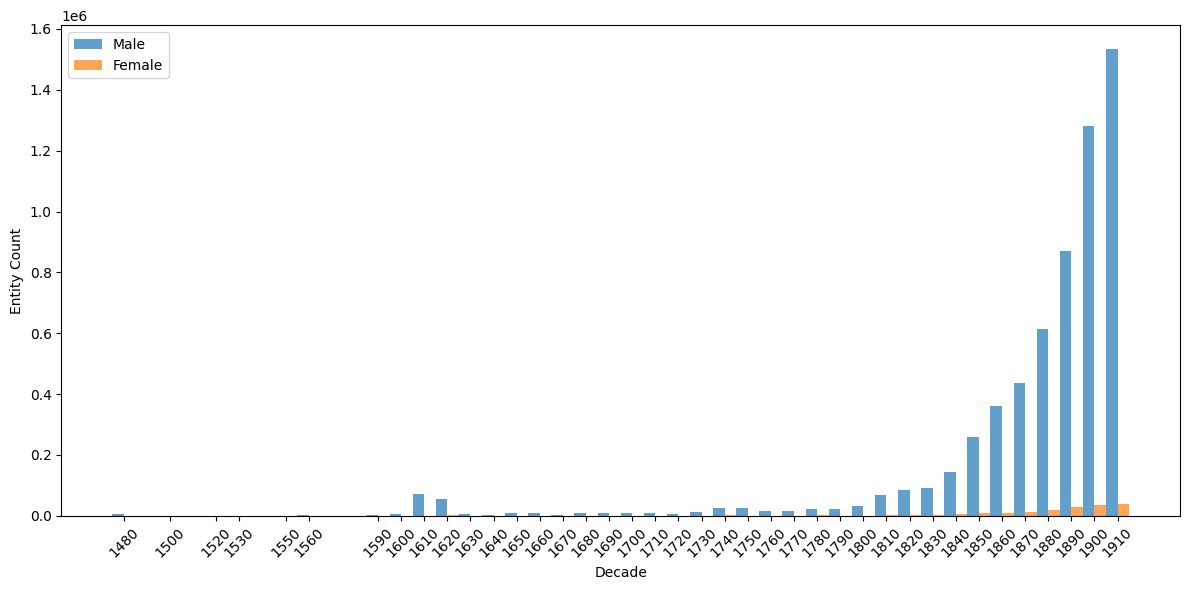

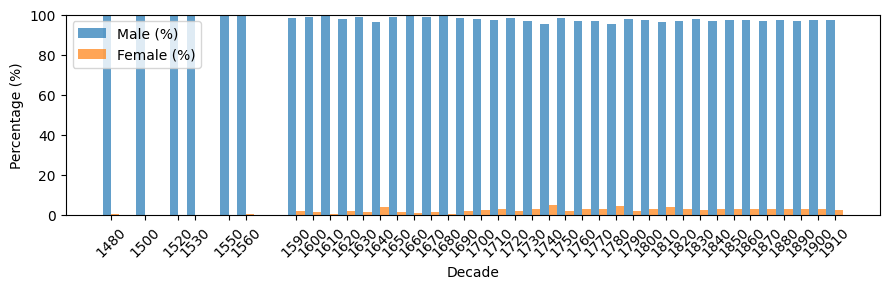

In [5]:
import json, os
from gender_analysis import find_named_entities_in_folder, plot_gender_entities_by_decade, plot_gender_entities_percentage_by_decade
output_dir = "../saved_results"
filename = f"{output_dir}/gender_named_entities_gender_spacy.json"
# entities_by_decade = find_named_entities_in_folder(TEXTS_PATH, filename)
with open(filename, "r") as file:
    entities_by_decade = json.load(file)
plot_gender_entities_by_decade(entities_by_decade, save_folder=output_dir)
plot_gender_entities_percentage_by_decade(entities_by_decade, save_folder=output_dir)

Processing texts: 100%|██████████| 9870/9870 [17:28<00:00,  9.41it/s]


Plot saved to ../saved_results/gender_entities_by_label_comparison.png


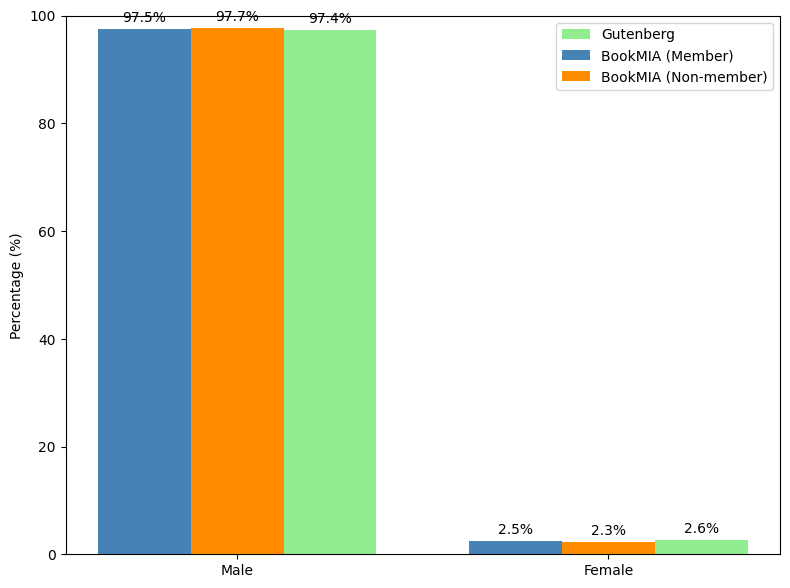

In [ ]:
from gender_analysis import count_gender_entities_bookMIA, plot_gender_entities_by_label_comparison
# compare to BookMIA dataset
output_boolMIA = f"{output_dir}/gender_named_entities_BookMIA.json"
entities_bookMIA, gender_entities_by_label = count_gender_entities_bookMIA(output_boolMIA)

plot_gender_entities_by_label_comparison(gender_entities_by_label, entities_by_decade, save_folder=output_dir)

## Genre classification


Classifying genres in documents...

Classification completed! Results saved to: ../saved_results/genre_classification_by_year.json

Plotting genre distribution...


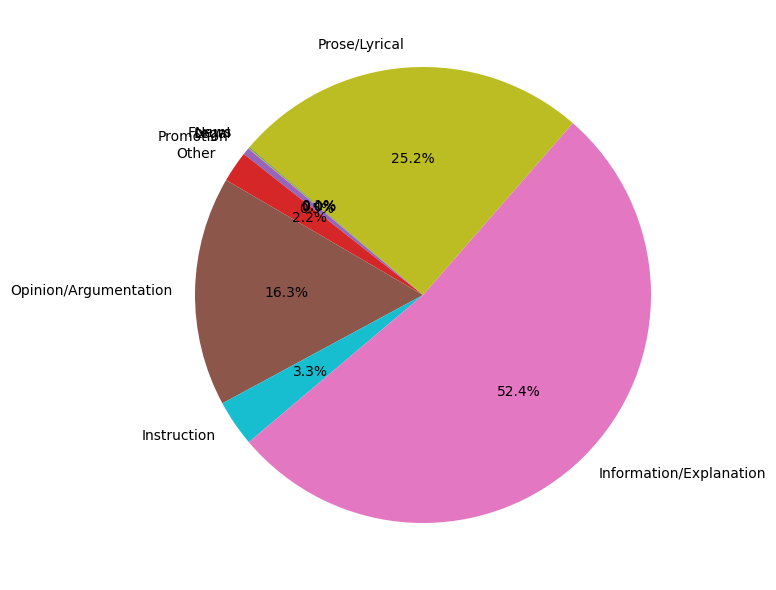

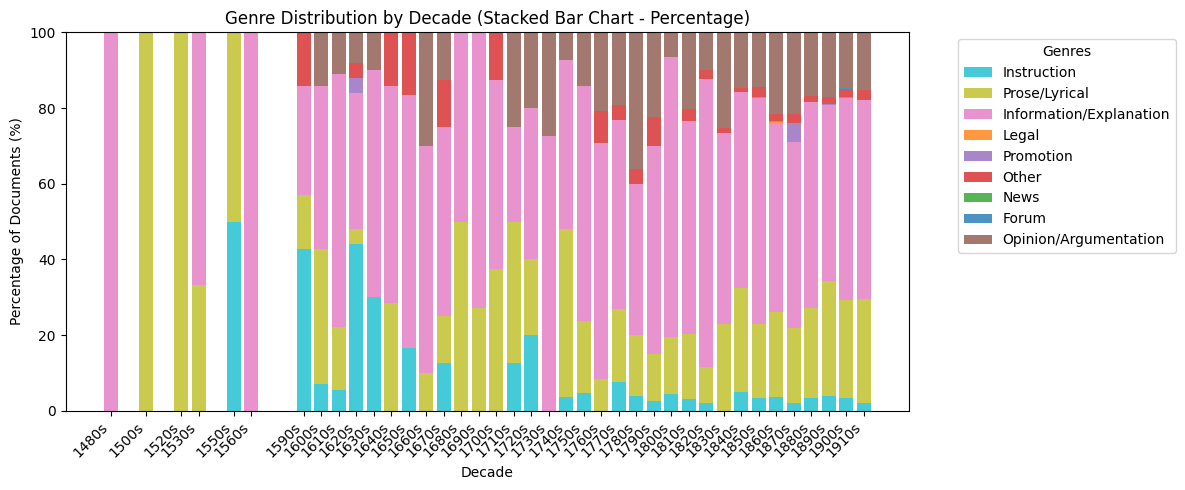


Plots saved in: ../saved_results


In [6]:
from genre_classification import main

output_dir = "../saved_results"
tests_path = TEXTS_PATH
main(tests_path, output_dir, use_existing_data=True)

## Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/germane/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Processing texts: 100%|██████████| 7582/7582 [1:29:33<00:00,  1.41it/s]  


Plot saved to 'saved_results/sentiment_trends_nltk_20250218_133431.png'


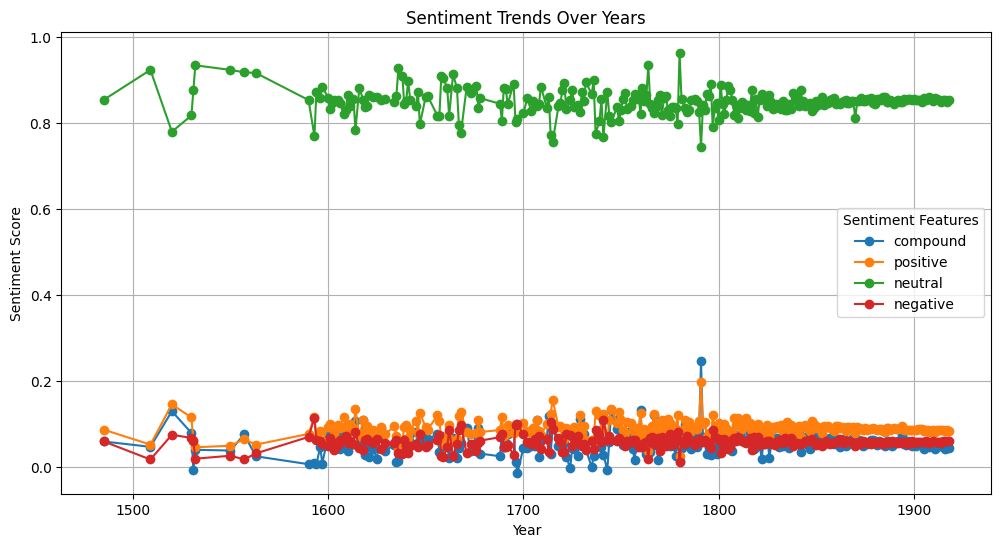

Processing texts: 100%|██████████| 7582/7582 [1:57:40<00:00,  1.07it/s]   


Plot saved to 'saved_results/sentiment_trends_textblob_20250218_133431.png'


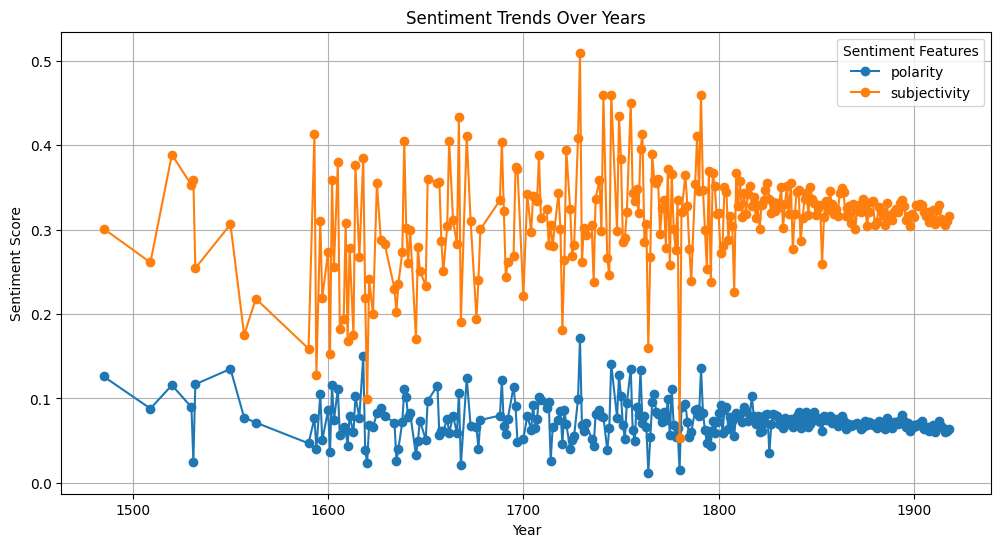

In [7]:
from sentiment_analysis import find_sentiment_in_folder, plot_sentiment_trends_over_years

folder_path = TEXTS_PATH
output_dir = "saved_results"
timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
kind = "nltk"
df_sentiment = find_sentiment_in_folder(folder_path, kind=kind, output_dir=output_dir)
plot_file = os.path.join(output_dir, f"sentiment_trends_{kind}_{timestamp}.png")
plot_sentiment_trends_over_years(df_sentiment, save_path=plot_file)

kind = "textblob"
df_sentiment = find_sentiment_in_folder(folder_path, kind=kind, output_dir=output_dir)
plot_file = os.path.join(output_dir, f"sentiment_trends_{kind}_{timestamp}.png")
plot_sentiment_trends_over_years(df_sentiment, save_path=plot_file)
